In [1]:
import rdkit

In [2]:
from rdkit import Chem

# 여러개의 분자들을 압축 파일로 부터 읽어들이기. 

* 압축파일을 읽기위해서 gzip 모듈을 읽어들여야 한다. 

In [3]:
import gzip

In [4]:
fp = gzip.open("./data/actives_5ht3.sdf.gz")

In [5]:
suppl = Chem.ForwardSDMolSupplier(fp)

In [6]:
type(suppl)

rdkit.Chem.rdmolfiles.ForwardSDMolSupplier

* list comprehension을 이용하면 빠르고 효율적으로 분자를 리스트에 저장할 수 있다. 

In [7]:
mols = [m for m in suppl if m is not None] # 분자에 문제가 있으면 None return함. 

In [8]:
len(mols)

180

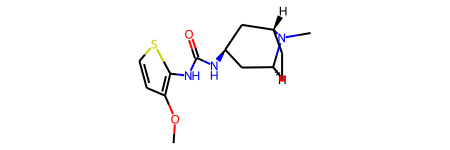

In [9]:
mols[0]

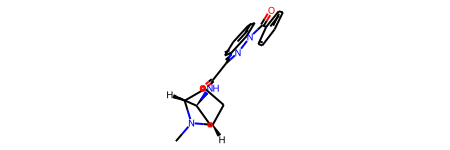

In [10]:
mols[1]

# 분자들의 리스트가 있을 때, 파일로 저장하기. 

* SDWriter를 사용. 

In [11]:
with Chem.SDWriter("mols.sdf") as fout:
    for m in mols:
        fout.write(m)

# 수소를 붙여보자!

* Chem.AddHs 함수를 사용. 
* 주의할점: AddHs를 사용하면 새로운 분자를 리턴. 

In [12]:
m1 = mols[0]

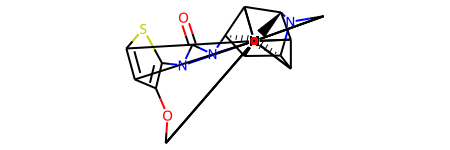

In [13]:
Chem.AddHs(m1) # 이렇게 실행하면 m1은 바뀌지 않고 그대로 유지. 

In [14]:
print(Chem.MolToMolBlock(m1))

tpls\mol-1.tpl
     RDKit          3D

 20 22  0  0  0  0  0  0  0  0999 V2000
    1.1200   -0.6200   -1.0800 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.5400    0.8200   -1.0600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200   -0.6400   -1.3200 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5600   -1.1800    0.3000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1400    1.2200    0.3200 C   0  0  2  0  0  0  0  0  0  0  0  0
    2.9600    1.0600   -1.3800 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2400    0.2400   -0.3000 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.5600    0.0600    1.2400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200    1.4600    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7800   -0.5600    0.7600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6400   -0.1600    1.7400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0600   -1.0400    2.6800 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0200    1.0000    1.7600 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9400 

In [15]:
m2 = Chem.AddHs(m1)

In [16]:
print(Chem.MolToMolBlock(m2))

tpls\mol-1.tpl
     RDKit          3D

 41 43  0  0  0  0  0  0  0  0999 V2000
    1.1200   -0.6200   -1.0800 C   0  0  1  0  0  0  0  0  0  0  0  0
    1.5400    0.8200   -1.0600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200   -0.6400   -1.3200 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5600   -1.1800    0.3000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1400    1.2200    0.3200 C   0  0  1  0  0  0  0  0  0  0  0  0
    2.9600    1.0600   -1.3800 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2400    0.2400   -0.3000 C   0  0  1  0  0  0  0  0  0  0  0  0
    1.5600    0.0600    1.2400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200    1.4600    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7800   -0.5600    0.7600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6400   -0.1600    1.7400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0600   -1.0400    2.6800 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0200    1.0000    1.7600 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9400 

* 수소의 좌표가 존재하지 않음.... 
* 수소를 지울 때에는 Chem.RemoveHs 사용. 

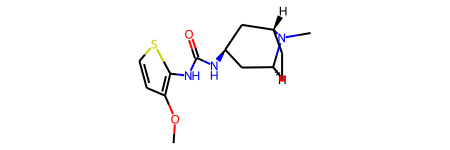

In [17]:
Chem.RemoveHs(m2)

In [18]:
print(Chem.MolToMolBlock(Chem.RemoveHs(m2)))

tpls\mol-1.tpl
     RDKit          3D

 20 22  0  0  0  0  0  0  0  0999 V2000
    1.1200   -0.6200   -1.0800 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.5400    0.8200   -1.0600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200   -0.6400   -1.3200 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5600   -1.1800    0.3000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1400    1.2200    0.3200 C   0  0  2  0  0  0  0  0  0  0  0  0
    2.9600    1.0600   -1.3800 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2400    0.2400   -0.3000 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.5600    0.0600    1.2400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200    1.4600    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7800   -0.5600    0.7600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6400   -0.1600    1.7400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0600   -1.0400    2.6800 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0200    1.0000    1.7600 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9400 

# 분자의 3차원 구조를 만들기. 

* 분자의 정확한 3차원 구조 (crystal 구조)를 알아내는 것은 여전히 어려운 문제이다!
* 정확한 3차원 구조를 얻기 위해서는 양자 계산 및 전역 최적화 계산이 필요하다. 
* 회전가능한 bond 개수가 많을수록 기하급수적으로 가능한 구조의 개수가 늘어나게 된다. 
* 모든 분자의 3차원 생성 코드는 일정한 가정 하에 진행된다. approximation 방법이라고 생각하면 된다. 
* RDKit 안에는 ETKDG 라는 방법이 구현되어 있음. 

In [19]:
from rdkit.Chem import AllChem # AllChem 안에는 더 다양하고 advanced 방법들이 들어 있음. 

* AllChem.EmbedMolecule 함수를 사용하면 됨. 
* AllChem.EmbedMolecule 함수는 입력받은 변수를 그자리에서 변화 시킴 (in-place). 

In [20]:
AllChem.EmbedMolecule(m2)

0

* 에러가 나지 않으면 0이 리턴됨. 

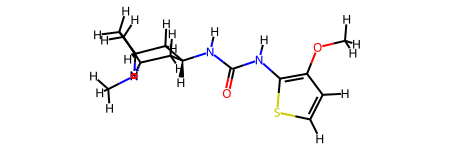

In [21]:
m2

In [22]:
print(Chem.MolToMolBlock(m2))

tpls\mol-1.tpl
     RDKit          3D

 41 43  0  0  0  0  0  0  0  0999 V2000
   -3.2477    0.0333   -1.6341 C   0  0  2  0  0  0  0  0  0  0  0  0
   -3.5614   -0.6266   -0.3905 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7722    0.3722   -1.6891 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.0795    1.2988   -1.5942 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.4943    0.4722    0.5551 C   0  0  2  0  0  0  0  0  0  0  0  0
   -4.8329   -1.2725   -0.3870 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1730    0.1250   -0.3443 C   0  0  2  0  0  0  0  0  0  0  0  0
   -4.2942    1.5383   -0.1205 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0248    0.8488    0.6808 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1789    0.5563   -0.2038 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.2636   -0.2823    0.1786 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5871    0.1608    0.3115 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.0007   -1.4856    0.4059 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.6165 

In [23]:
m3 = Chem.MolFromSmiles("c1ccccc1")

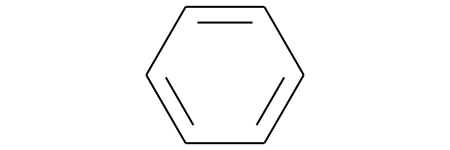

In [24]:
m3

In [25]:
print(Chem.MolToMolBlock(m3))


     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



In [26]:
m3_H = Chem.AddHs(m3)

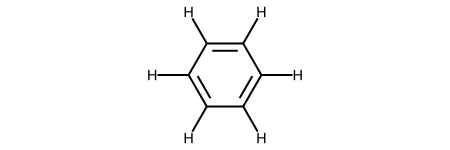

In [27]:
m3_H

In [28]:
AllChem.EmbedMolecule(m3_H)

0

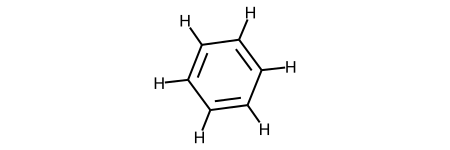

In [29]:
m3_H

# Fingerprint 

In [30]:
from rdkit import DataStructs

In [31]:
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'),Chem.MolFromSmiles('COC')]

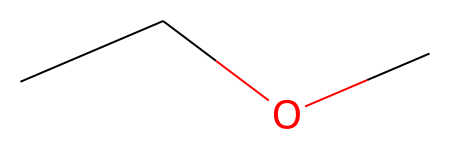

In [32]:
ms[0]

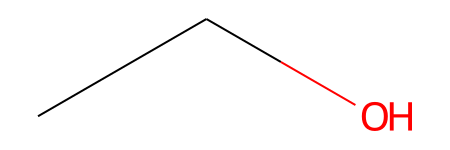

In [33]:
ms[1]

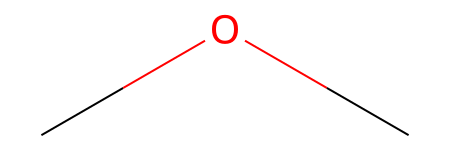

In [34]:
ms[2]

In [35]:
type(ms[0])

rdkit.Chem.rdchem.Mol

* Chem.RDKFingerprint 함수를 사용하면 RDKit fingerprint를 사용할 수 있다. 

In [36]:
fps = [Chem.RDKFingerprint(m) for m in ms]

In [37]:
fps[0]

In [38]:
fps[1]

In [39]:
fps[2]

In [40]:
print(fps[0])

In [41]:
for idx, x in enumerate(fps[0]):
    if x==1:
        print(idx, x)
print("Last digit: ", idx)

121 1
308 1
562 1
1183 1
1308 1
1339 1
1728 1
1772 1
1941 1
1960 1
Last digit:  2047


* 유사도 계산. 

In [42]:
DataStructs.FingerprintSimilarity(fps[0],fps[1]) # Tanimoto Similarity 계산. 

0.6

* 유사도는 일반적으로 Tanimoto similarity 
* Tanimoto similarity = (교집합의 개수)/(합집합의 개수)

In [43]:
DataStructs.FingerprintSimilarity(fps[1],fps[2])

0.25

In [44]:
DataStructs.FingerprintSimilarity(fps[0],fps[1], metric=DataStructs.DiceSimilarity) # Dice similarity를 사용하겠다. 

0.75

## MACCS Key

In [45]:
from rdkit.Chem import MACCSkeys

* Fingerprint 생성

In [46]:
fps = [MACCSkeys.GenMACCSKeys(x) for x in ms]

In [47]:
fps[0]

In [48]:
for idx, x in enumerate(fps[0]):
    if x==1:
        print(idx, x)
print("Last digit: ", idx)

86 1
93 1
109 1
114 1
115 1
126 1
149 1
153 1
155 1
157 1
160 1
164 1
Last digit:  166


* MACCS 기반으로 (166차원의 0/1 벡터를 기반으로) Tanimoto similarity 계산

In [49]:
DataStructs.FingerprintSimilarity(fps[0],fps[1]) # Tanimoto Similarity 계산. 

0.5

In [50]:
DataStructs.FingerprintSimilarity(fps[2],fps[1]) # Tanimoto Similarity 계산. 

0.21428571428571427

## Morgan Fingerprint, ECFP를 만들어보자. 
* 각 중심 원자에서 얼만큼 떨어진 이웃한 원자까지 고려할지 정해줘야함. (반지름)
* radius = 1, ECFP2
* radius = 2, ECFP4

In [51]:
fps = [AllChem.GetMorganFingerprint(x, 2) for x in ms]

In [52]:
fps[0]

In [53]:
fps[1]

In [54]:
fps[2]

In [ ]:
for x in fps[0]:
    if x != 0:
        print(x)

In [ ]:
DataStructs.DiceSimilarity(fps[0],fps[1])

In [ ]:
DataStructs.DiceSimilarity(fps[2],fps[1])

* Morgan fingerprint를 정수의 리스트가 아니라 Bit vector로 얻기 위해서는 AllChem.GetMorganFingerprintAsBitVect 를 사용한다. 

In [56]:
fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2) for x in ms]

In [57]:
fps[0]

In [58]:
fps[1]

In [59]:
fps[2]

In [60]:
for idx, x in enumerate(fps[0]):
    if x==1:
        print(idx, x)
print("Last digit: ", idx)

80 1
294 1
695 1
817 1
841 1
1005 1
1057 1
1238 1
Last digit:  2047


* 2048개의 bit로 분자가 변환되었다는 것을 알 수 있다. 

In [61]:
DataStructs.DiceSimilarity(fps[0],fps[1])

0.42857142857142855

In [62]:
DataStructs.FingerprintSimilarity(fps[0],fps[1])

0.2727272727272727

In [63]:
DataStructs.FingerprintSimilarity(fps[2],fps[1])

0.1111111111111111